# POTATO LEAF DISEASE CLASSIFICATION
- Based on three classes (Early Blight, Late Blight and Healthy)

## Import all the required modules and dependencies

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

## Set the constant values

In [3]:
BATCH_SIZE = 32
IMAGE_SIZE = 256

## Import the dataset

In [5]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "C:\\Users\\Snehashish\\DAA ML\\train",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 5702 files belonging to 3 classes.


In [7]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

## Visualizing some of the images

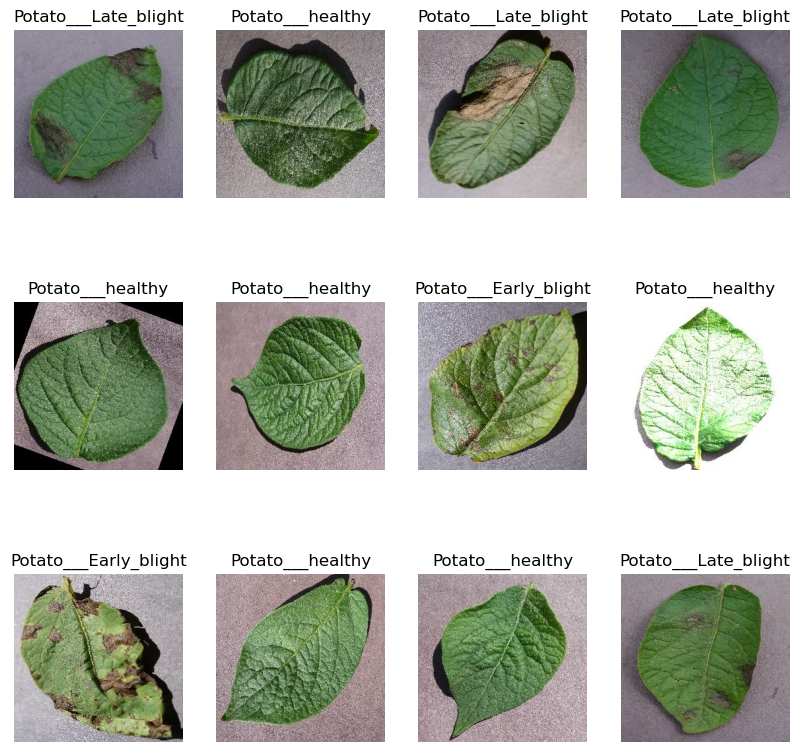

In [9]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [11]:
len(dataset)


179

## Spliting the Dataset (80-10-10)

In [23]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [25]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [27]:
len(train_ds)

143

In [29]:
len(val_ds)

17

In [31]:
len(test_ds)

19

## Cache, Shuffle, and Prefetch the Dataset

In [33]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

# Building the Model
(Resize, Rescale and Augmentation)

In [35]:
from tensorflow.keras import Sequential

resize_and_rescale = Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0 / 255),
])


In [37]:
data_augmentation = Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])


# CNN MODEL ARCHITECTURE

In [39]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)


D:\conda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [41]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (32, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (32, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (32, 4, 4, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (32, 2, 2, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 64)               │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 3)                │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

# Compiling the Model
### (Using adam as the optimizer)

In [43]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [45]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=30,
)

Epoch 1/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 209s 1s/step - accuracy: 0.5184 - loss: 0.9525 - val_accuracy: 0.7224 - val_loss: 0.7130
Epoch 2/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 178s 1s/step - accuracy: 0.7197 - loss: 0.6224 - val_accuracy: 0.7353 - val_loss: 0.7724
Epoch 3/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 179s 1s/step - accuracy: 0.9211 - loss: 0.2398 - val_accuracy: 0.9357 - val_loss: 0.2228
Epoch 4/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 181s 1s/step - accuracy: 0.9606 - loss: 0.1046 - val_accuracy: 0.9320 - val_loss: 0.1828
Epoch 5/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 177s 1s/step - accuracy: 0.9341 - loss: 0.2075 - val_accuracy: 0.9136 - val_loss: 0.2389
Epoch 6/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 197s 1s/step - accuracy: 0.9847 - loss: 0.0452 - val_accuracy: 0.8824 - val_loss: 0.3201
Epoch 7/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 170s 1s/step - accuracy: 0.9840 - loss: 0.0547 - val_accuracy: 0.9246 - val_loss: 0.2105
Epoch 8/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 172s 1s/step - accuracy: 0.9904 - loss: 0.0277 - val_accu

In [91]:
scores = model.evaluate(test_ds)
scores

19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 237ms/step - accuracy: 0.9906 - loss: 0.0347


[0.04567382112145424, 0.9917762875556946]

In [93]:
accuracy = scores[1]
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 99.18%


### A 99.18% accuracy is achieved using CNN Model

# Plotting the Accuracy and Loss Curves

In [95]:
history

In [97]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 143}

In [99]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [105]:
history.history['accuracy'][:5]

[0.6087912321090698,
 0.7569230794906616,
 0.9384615421295166,
 0.9599999785423279,
 0.9573626518249512]

In [107]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

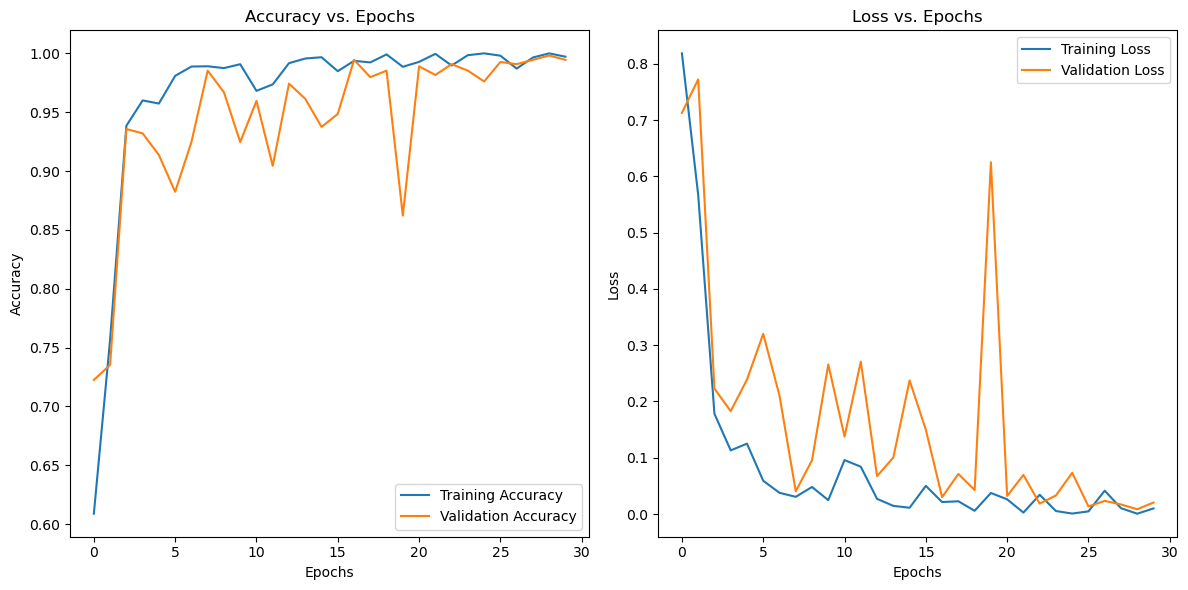

In [109]:
epochs_range = range(len(acc))
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


## SAVING THE MODEL

In [111]:
model.save('first_potatoleaf_model.h5')

In [113]:
model.save('potatoCNN_kerasmodel.keras')

## LOADING THE SAVED MODEL (FOR CHECKING)

In [115]:
from tensorflow.keras.models import load_model

loaded_model = load_model('potatoCNN_kerasmodel.keras')

D:\conda\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 18 variables whereas the saved optimizer has 34 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [117]:
scores2 = loaded_model.evaluate(test_ds)
print(f"Loaded Model Test Accuracy: {scores2[1] * 100:.2f}%")

19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 230ms/step - accuracy: 0.9938 - loss: 0.0394
Loaded Model Test Accuracy: 99.18%


## TESTING A SAMPLE IMAGE FROM TEST SPLIT

First image to predict:


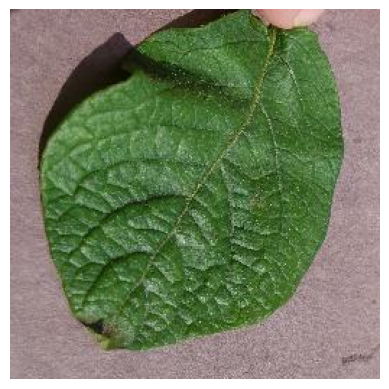

Actual label: Potato___healthy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step
Predicted label: Potato___healthy


In [119]:
import numpy as np

for images_batch, labels_batch in test_ds.take(1):  
    first_image = images_batch[0].numpy().astype('uint8') 
    first_label = labels_batch[0].numpy() 

    print("First image to predict:")
    plt.imshow(first_image)
    plt.axis('off')
    plt.show()

    print("Actual label:", class_names[first_label])
    batch_prediction = model.predict(images_batch)
    predicted_label = np.argmax(batch_prediction[0])  # Get the predicted class for the first image
    print("Predicted label:", class_names[predicted_label])

# RUNNING AN INFERENCE OF FEW SAMPLE IMAGES

In [121]:
def predict(model, img):
    img_array = tf.expand_dims(img, axis=0)

    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * np.max(predictions[0]), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


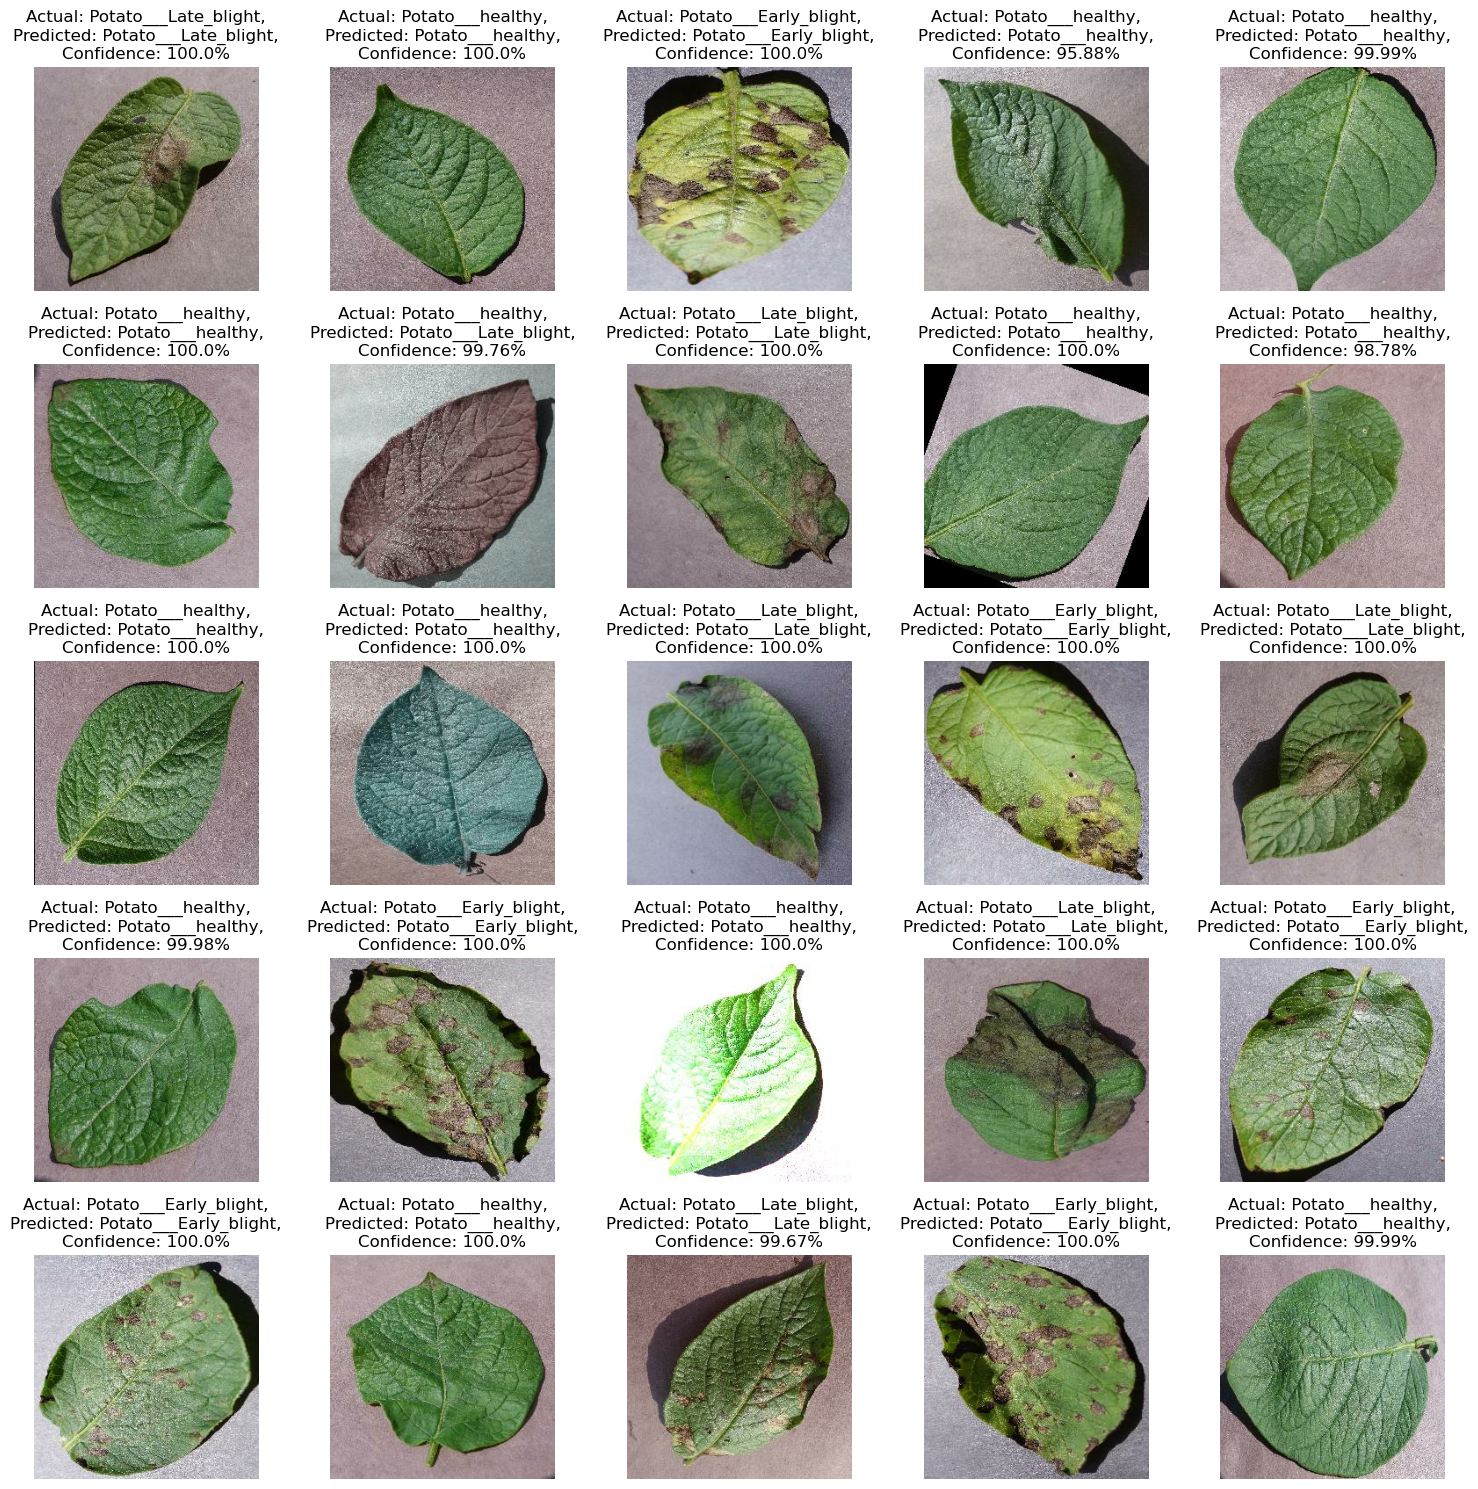

In [125]:
num_images = 25
rows = int(num_images**0.5) 
cols = int(np.ceil(num_images / rows))

plt.figure(figsize=(15, 15))
image_count = 0

for images, labels in test_ds:
    for i in range(len(images)):
        if image_count >= num_images:  
            break
        ax = plt.subplot(rows, cols, image_count + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i].numpy()]
        plt.title(f"Actual: {actual_class},\nPredicted: {predicted_class},\nConfidence: {confidence}%")
        plt.axis("off")
        image_count += 1
    if image_count >= num_images:
        break

plt.tight_layout()
plt.show()

## PLOTTING THE CONFUSION MATRIX
- Diagonal values show correct predictions.
- Off-diagonal values show misclassifications.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


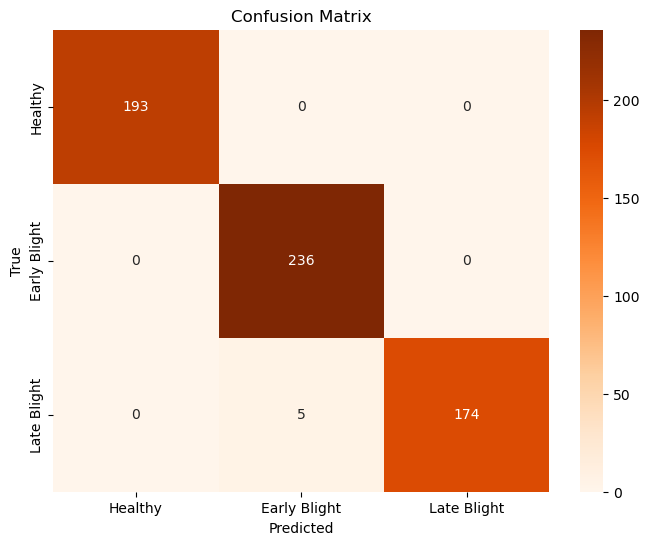

[[193   0   0]
 [  0 236   0]
 [  0   5 174]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       193
           1       0.98      1.00      0.99       236
           2       1.00      0.97      0.99       179

    accuracy                           0.99       608
   macro avg       0.99      0.99      0.99       608
weighted avg       0.99      0.99      0.99       608



In [151]:
from sklearn.metrics import roc_curve, auc, roc_auc_score, average_precision_score, precision_recall_curve, accuracy_score, classification_report, confusion_matrix

class_names = ['Healthy', 'Early Blight', 'Late Blight']

true_labels = []
predicted_labels = []

for images, labels in test_ds:
    batch_predictions = model.predict(images)
    predicted_labels_batch = np.argmax(batch_predictions, axis=1)
    
    true_labels.extend(labels.numpy())
    predicted_labels.extend(predicted_labels_batch)

true_labels = np.array(true_labels)
predicted_labels = np.array(predicted_labels)

cm = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print(cm)
print(classification_report(true_labels, predicted_labels))